## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              85.79
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   9.07e-106
Time:                        10:47:12   Log-Likelihood:                         -301.25
No. Observations:                 404   AIC:                                      628.5
Df Residuals:                     391   BIC:                                      680.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

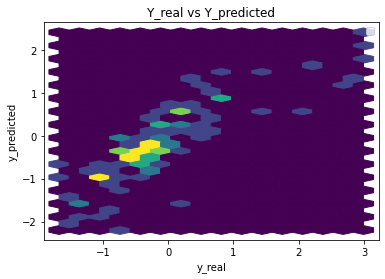

Performance Metrics
Mean Squared Error: 0.2863676697827541
Mean Absolute Error: 0.3891466046617996
Manhattan distance: 39.69295367550357
Euclidean distance: 5.404581604328027


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.20735518490806715


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9672840	total: 70.2ms	remaining: 1m 10s
1:	learn: 0.9474224	total: 71.4ms	remaining: 35.6s
2:	learn: 0.9280219	total: 72.5ms	remaining: 24.1s
3:	learn: 0.9118459	total: 73.5ms	remaining: 18.3s
4:	learn: 0.8937689	total: 74.4ms	remaining: 14.8s
5:	learn: 0.8769706	total: 75.5ms	remaining: 12.5s
6:	learn: 0.8608989	total: 76.5ms	remaining: 10.9s
7:	learn: 0.8448484	total: 77.5ms	remaining: 9.61s
8:	learn: 0.8293064	total: 78.5ms	remaining: 8.64s
9:	learn: 0.8140948	total: 79.5ms	remaining: 7.87s
10:	learn: 0.7987401	total: 80.4ms	remaining: 7.23s
11:	learn: 0.7837893	total: 81.4ms	remaining: 6.7s
12:	learn: 0.7701105	total: 82.3ms	remaining: 6.25s
13:	learn: 0.7559347	total: 83.3ms	remaining: 5.87s
14:	learn: 0.7445294	total: 84.3ms	remaining: 5.54s
15:	learn: 0.7313304	total: 85.2ms	remaining: 5.24s
16:	learn: 0.7193831	total: 86.2ms	remaining: 4.98s
17:	learn: 0.7068607	total: 87.1ms	remaining: 4.75s
18:	learn: 0.6946170	total: 87.9ms	remaining: 4.54s
19:	learn: 0.6827070	t

104:	learn: 0.3054718	total: 160ms	remaining: 1.36s
105:	learn: 0.3040295	total: 161ms	remaining: 1.35s
106:	learn: 0.3021812	total: 161ms	remaining: 1.35s
107:	learn: 0.3005594	total: 162ms	remaining: 1.34s
108:	learn: 0.2993668	total: 163ms	remaining: 1.33s
109:	learn: 0.2980348	total: 164ms	remaining: 1.33s
110:	learn: 0.2962198	total: 165ms	remaining: 1.32s
111:	learn: 0.2950095	total: 166ms	remaining: 1.31s
112:	learn: 0.2934972	total: 167ms	remaining: 1.31s
113:	learn: 0.2922294	total: 168ms	remaining: 1.3s
114:	learn: 0.2910518	total: 168ms	remaining: 1.29s
115:	learn: 0.2899293	total: 169ms	remaining: 1.29s
116:	learn: 0.2886232	total: 170ms	remaining: 1.28s
117:	learn: 0.2869381	total: 171ms	remaining: 1.28s
118:	learn: 0.2859625	total: 172ms	remaining: 1.27s
119:	learn: 0.2850342	total: 172ms	remaining: 1.26s
120:	learn: 0.2832521	total: 173ms	remaining: 1.26s
121:	learn: 0.2822740	total: 174ms	remaining: 1.25s
122:	learn: 0.2810245	total: 175ms	remaining: 1.25s
123:	learn: 0

143:	learn: 0.2585894	total: 192ms	remaining: 1.14s
144:	learn: 0.2577688	total: 193ms	remaining: 1.14s
145:	learn: 0.2566297	total: 194ms	remaining: 1.14s
146:	learn: 0.2556779	total: 195ms	remaining: 1.13s
147:	learn: 0.2549400	total: 196ms	remaining: 1.13s
148:	learn: 0.2541176	total: 197ms	remaining: 1.12s
149:	learn: 0.2537671	total: 197ms	remaining: 1.12s
150:	learn: 0.2525422	total: 198ms	remaining: 1.11s
151:	learn: 0.2518659	total: 199ms	remaining: 1.11s
152:	learn: 0.2510202	total: 200ms	remaining: 1.1s
153:	learn: 0.2504144	total: 201ms	remaining: 1.1s
154:	learn: 0.2496523	total: 201ms	remaining: 1.1s
155:	learn: 0.2487911	total: 202ms	remaining: 1.09s
156:	learn: 0.2477679	total: 203ms	remaining: 1.09s
157:	learn: 0.2467909	total: 204ms	remaining: 1.09s
158:	learn: 0.2456610	total: 205ms	remaining: 1.08s
159:	learn: 0.2451149	total: 205ms	remaining: 1.08s
160:	learn: 0.2446697	total: 206ms	remaining: 1.07s
161:	learn: 0.2440712	total: 207ms	remaining: 1.07s
162:	learn: 0.2

224:	learn: 0.2058780	total: 260ms	remaining: 897ms
225:	learn: 0.2052828	total: 261ms	remaining: 895ms
226:	learn: 0.2050206	total: 262ms	remaining: 893ms
227:	learn: 0.2047727	total: 263ms	remaining: 891ms
228:	learn: 0.2042037	total: 264ms	remaining: 889ms
229:	learn: 0.2037052	total: 265ms	remaining: 886ms
230:	learn: 0.2031116	total: 266ms	remaining: 884ms
231:	learn: 0.2024311	total: 266ms	remaining: 882ms
232:	learn: 0.2018641	total: 267ms	remaining: 879ms
233:	learn: 0.2015202	total: 268ms	remaining: 877ms
234:	learn: 0.2009000	total: 269ms	remaining: 875ms
235:	learn: 0.2004683	total: 270ms	remaining: 873ms
236:	learn: 0.2002145	total: 270ms	remaining: 871ms
237:	learn: 0.1998475	total: 271ms	remaining: 869ms
238:	learn: 0.1995936	total: 272ms	remaining: 867ms
239:	learn: 0.1992073	total: 273ms	remaining: 865ms
240:	learn: 0.1988097	total: 274ms	remaining: 862ms
241:	learn: 0.1985830	total: 275ms	remaining: 860ms
242:	learn: 0.1981225	total: 275ms	remaining: 858ms
243:	learn: 

313:	learn: 0.1699252	total: 365ms	remaining: 798ms
314:	learn: 0.1696069	total: 366ms	remaining: 797ms
315:	learn: 0.1693037	total: 367ms	remaining: 795ms
316:	learn: 0.1690792	total: 368ms	remaining: 793ms
317:	learn: 0.1687011	total: 369ms	remaining: 791ms
318:	learn: 0.1685740	total: 370ms	remaining: 790ms
319:	learn: 0.1682103	total: 371ms	remaining: 788ms
320:	learn: 0.1679852	total: 372ms	remaining: 786ms
321:	learn: 0.1676538	total: 372ms	remaining: 784ms
322:	learn: 0.1672918	total: 373ms	remaining: 782ms
323:	learn: 0.1667418	total: 374ms	remaining: 781ms
324:	learn: 0.1661931	total: 375ms	remaining: 779ms
325:	learn: 0.1658224	total: 376ms	remaining: 777ms
326:	learn: 0.1654614	total: 376ms	remaining: 775ms
327:	learn: 0.1652236	total: 377ms	remaining: 773ms
328:	learn: 0.1648932	total: 378ms	remaining: 771ms
329:	learn: 0.1648234	total: 379ms	remaining: 770ms
330:	learn: 0.1643115	total: 380ms	remaining: 768ms
331:	learn: 0.1640622	total: 381ms	remaining: 766ms
332:	learn: 

334:	learn: 0.1630175	total: 384ms	remaining: 763ms
335:	learn: 0.1626113	total: 385ms	remaining: 761ms
336:	learn: 0.1624854	total: 386ms	remaining: 759ms
337:	learn: 0.1620408	total: 387ms	remaining: 758ms
338:	learn: 0.1619808	total: 388ms	remaining: 756ms
339:	learn: 0.1615149	total: 389ms	remaining: 754ms
340:	learn: 0.1610833	total: 389ms	remaining: 752ms
341:	learn: 0.1607786	total: 390ms	remaining: 751ms
342:	learn: 0.1603851	total: 391ms	remaining: 749ms
343:	learn: 0.1603272	total: 392ms	remaining: 747ms
344:	learn: 0.1599282	total: 392ms	remaining: 745ms
345:	learn: 0.1595210	total: 393ms	remaining: 743ms
346:	learn: 0.1591022	total: 394ms	remaining: 741ms
347:	learn: 0.1586311	total: 395ms	remaining: 739ms
348:	learn: 0.1582994	total: 395ms	remaining: 737ms
349:	learn: 0.1582321	total: 396ms	remaining: 736ms
350:	learn: 0.1579281	total: 397ms	remaining: 734ms
351:	learn: 0.1576405	total: 398ms	remaining: 733ms
352:	learn: 0.1573450	total: 399ms	remaining: 731ms
353:	learn: 

411:	learn: 0.1435965	total: 452ms	remaining: 646ms
412:	learn: 0.1434425	total: 453ms	remaining: 644ms
413:	learn: 0.1431056	total: 455ms	remaining: 643ms
414:	learn: 0.1428251	total: 456ms	remaining: 642ms
415:	learn: 0.1424572	total: 457ms	remaining: 641ms
416:	learn: 0.1424214	total: 458ms	remaining: 640ms
417:	learn: 0.1423899	total: 459ms	remaining: 639ms
418:	learn: 0.1423522	total: 460ms	remaining: 638ms
419:	learn: 0.1423153	total: 461ms	remaining: 637ms
420:	learn: 0.1420548	total: 462ms	remaining: 636ms
421:	learn: 0.1418270	total: 463ms	remaining: 634ms
422:	learn: 0.1415011	total: 464ms	remaining: 633ms
423:	learn: 0.1410886	total: 465ms	remaining: 632ms
424:	learn: 0.1410560	total: 466ms	remaining: 630ms
425:	learn: 0.1408283	total: 467ms	remaining: 629ms
426:	learn: 0.1407768	total: 468ms	remaining: 628ms
427:	learn: 0.1407426	total: 469ms	remaining: 627ms
428:	learn: 0.1405300	total: 470ms	remaining: 626ms
429:	learn: 0.1405054	total: 471ms	remaining: 624ms
430:	learn: 

529:	learn: 0.1213579	total: 556ms	remaining: 493ms
530:	learn: 0.1213363	total: 557ms	remaining: 492ms
531:	learn: 0.1211377	total: 558ms	remaining: 491ms
532:	learn: 0.1210523	total: 559ms	remaining: 490ms
533:	learn: 0.1209570	total: 560ms	remaining: 488ms
534:	learn: 0.1206662	total: 560ms	remaining: 487ms
535:	learn: 0.1205309	total: 561ms	remaining: 486ms
536:	learn: 0.1202966	total: 562ms	remaining: 485ms
537:	learn: 0.1200807	total: 563ms	remaining: 483ms
538:	learn: 0.1198441	total: 564ms	remaining: 482ms
539:	learn: 0.1194974	total: 565ms	remaining: 481ms
540:	learn: 0.1194784	total: 565ms	remaining: 480ms
541:	learn: 0.1193519	total: 566ms	remaining: 478ms
542:	learn: 0.1192925	total: 567ms	remaining: 477ms
543:	learn: 0.1190966	total: 568ms	remaining: 476ms
544:	learn: 0.1188242	total: 569ms	remaining: 475ms
545:	learn: 0.1186552	total: 570ms	remaining: 474ms
546:	learn: 0.1185049	total: 571ms	remaining: 473ms
547:	learn: 0.1182228	total: 571ms	remaining: 471ms
548:	learn: 

551:	learn: 0.1176985	total: 575ms	remaining: 466ms
552:	learn: 0.1176169	total: 576ms	remaining: 465ms
553:	learn: 0.1175996	total: 576ms	remaining: 464ms
554:	learn: 0.1175803	total: 577ms	remaining: 463ms
555:	learn: 0.1174212	total: 578ms	remaining: 462ms
556:	learn: 0.1173538	total: 579ms	remaining: 461ms
557:	learn: 0.1170563	total: 580ms	remaining: 459ms
558:	learn: 0.1170422	total: 581ms	remaining: 458ms
559:	learn: 0.1168677	total: 582ms	remaining: 457ms
560:	learn: 0.1168499	total: 582ms	remaining: 456ms
561:	learn: 0.1165818	total: 583ms	remaining: 454ms
562:	learn: 0.1163607	total: 584ms	remaining: 453ms
563:	learn: 0.1163234	total: 585ms	remaining: 452ms
564:	learn: 0.1160627	total: 586ms	remaining: 451ms
565:	learn: 0.1158369	total: 586ms	remaining: 450ms
566:	learn: 0.1158132	total: 587ms	remaining: 448ms
567:	learn: 0.1156086	total: 588ms	remaining: 447ms
568:	learn: 0.1153588	total: 589ms	remaining: 446ms
569:	learn: 0.1151463	total: 590ms	remaining: 445ms
570:	learn: 

633:	learn: 0.1043706	total: 643ms	remaining: 371ms
634:	learn: 0.1042033	total: 643ms	remaining: 370ms
635:	learn: 0.1041943	total: 644ms	remaining: 369ms
636:	learn: 0.1041652	total: 645ms	remaining: 368ms
637:	learn: 0.1041521	total: 646ms	remaining: 366ms
638:	learn: 0.1040845	total: 647ms	remaining: 365ms
639:	learn: 0.1039860	total: 648ms	remaining: 364ms
640:	learn: 0.1038063	total: 648ms	remaining: 363ms
641:	learn: 0.1037951	total: 649ms	remaining: 362ms
642:	learn: 0.1037834	total: 650ms	remaining: 361ms
643:	learn: 0.1034959	total: 651ms	remaining: 360ms
644:	learn: 0.1034461	total: 652ms	remaining: 359ms
645:	learn: 0.1033505	total: 653ms	remaining: 358ms
646:	learn: 0.1030823	total: 653ms	remaining: 356ms
647:	learn: 0.1029557	total: 654ms	remaining: 355ms
648:	learn: 0.1028875	total: 655ms	remaining: 354ms
649:	learn: 0.1027079	total: 656ms	remaining: 353ms
650:	learn: 0.1025628	total: 657ms	remaining: 352ms
651:	learn: 0.1022592	total: 658ms	remaining: 351ms
652:	learn: 

755:	learn: 0.0871979	total: 746ms	remaining: 241ms
756:	learn: 0.0869696	total: 747ms	remaining: 240ms
757:	learn: 0.0868289	total: 748ms	remaining: 239ms
758:	learn: 0.0866661	total: 748ms	remaining: 238ms
759:	learn: 0.0866077	total: 749ms	remaining: 237ms
760:	learn: 0.0864935	total: 750ms	remaining: 236ms
761:	learn: 0.0862946	total: 751ms	remaining: 234ms
762:	learn: 0.0860698	total: 752ms	remaining: 233ms
763:	learn: 0.0860596	total: 752ms	remaining: 232ms
764:	learn: 0.0859292	total: 753ms	remaining: 231ms
765:	learn: 0.0858034	total: 754ms	remaining: 230ms
766:	learn: 0.0855882	total: 755ms	remaining: 229ms
767:	learn: 0.0855769	total: 756ms	remaining: 228ms
768:	learn: 0.0853399	total: 756ms	remaining: 227ms
769:	learn: 0.0852674	total: 757ms	remaining: 226ms
770:	learn: 0.0851905	total: 758ms	remaining: 225ms
771:	learn: 0.0850190	total: 759ms	remaining: 224ms
772:	learn: 0.0850076	total: 760ms	remaining: 223ms
773:	learn: 0.0848884	total: 761ms	remaining: 222ms
774:	learn: 

778:	learn: 0.0843457	total: 765ms	remaining: 217ms
779:	learn: 0.0842147	total: 766ms	remaining: 216ms
780:	learn: 0.0841493	total: 767ms	remaining: 215ms
781:	learn: 0.0839799	total: 768ms	remaining: 214ms
782:	learn: 0.0838005	total: 769ms	remaining: 213ms
783:	learn: 0.0836589	total: 770ms	remaining: 212ms
784:	learn: 0.0835379	total: 770ms	remaining: 211ms
785:	learn: 0.0833004	total: 771ms	remaining: 210ms
786:	learn: 0.0831773	total: 772ms	remaining: 209ms
787:	learn: 0.0829584	total: 773ms	remaining: 208ms
788:	learn: 0.0827980	total: 774ms	remaining: 207ms
789:	learn: 0.0826952	total: 774ms	remaining: 206ms
790:	learn: 0.0825127	total: 775ms	remaining: 205ms
791:	learn: 0.0824958	total: 776ms	remaining: 204ms
792:	learn: 0.0823640	total: 777ms	remaining: 203ms
793:	learn: 0.0823002	total: 778ms	remaining: 202ms
794:	learn: 0.0821222	total: 779ms	remaining: 201ms
795:	learn: 0.0819618	total: 779ms	remaining: 200ms
796:	learn: 0.0818606	total: 780ms	remaining: 199ms
797:	learn: 

857:	learn: 0.0750765	total: 833ms	remaining: 138ms
858:	learn: 0.0748984	total: 834ms	remaining: 137ms
859:	learn: 0.0748106	total: 835ms	remaining: 136ms
860:	learn: 0.0747672	total: 836ms	remaining: 135ms
861:	learn: 0.0747026	total: 836ms	remaining: 134ms
862:	learn: 0.0746654	total: 837ms	remaining: 133ms
863:	learn: 0.0745377	total: 839ms	remaining: 132ms
864:	learn: 0.0744467	total: 840ms	remaining: 131ms
865:	learn: 0.0743477	total: 841ms	remaining: 130ms
866:	learn: 0.0742247	total: 842ms	remaining: 129ms
867:	learn: 0.0742135	total: 842ms	remaining: 128ms
868:	learn: 0.0740797	total: 843ms	remaining: 127ms
869:	learn: 0.0739576	total: 844ms	remaining: 126ms
870:	learn: 0.0738636	total: 845ms	remaining: 125ms
871:	learn: 0.0738531	total: 846ms	remaining: 124ms
872:	learn: 0.0737453	total: 847ms	remaining: 123ms
873:	learn: 0.0736860	total: 847ms	remaining: 122ms
874:	learn: 0.0736111	total: 848ms	remaining: 121ms
875:	learn: 0.0735514	total: 849ms	remaining: 120ms
876:	learn: 

978:	learn: 0.0642384	total: 937ms	remaining: 20.1ms
979:	learn: 0.0640999	total: 938ms	remaining: 19.1ms
980:	learn: 0.0640572	total: 938ms	remaining: 18.2ms
981:	learn: 0.0639461	total: 939ms	remaining: 17.2ms
982:	learn: 0.0638357	total: 940ms	remaining: 16.3ms
983:	learn: 0.0637785	total: 941ms	remaining: 15.3ms
984:	learn: 0.0637209	total: 942ms	remaining: 14.3ms
985:	learn: 0.0636554	total: 943ms	remaining: 13.4ms
986:	learn: 0.0635605	total: 943ms	remaining: 12.4ms
987:	learn: 0.0634874	total: 944ms	remaining: 11.5ms
988:	learn: 0.0633765	total: 945ms	remaining: 10.5ms
989:	learn: 0.0633325	total: 946ms	remaining: 9.55ms
990:	learn: 0.0633280	total: 946ms	remaining: 8.59ms
991:	learn: 0.0632629	total: 947ms	remaining: 7.64ms
992:	learn: 0.0632108	total: 948ms	remaining: 6.68ms
993:	learn: 0.0630688	total: 949ms	remaining: 5.73ms
994:	learn: 0.0629540	total: 949ms	remaining: 4.77ms
995:	learn: 0.0629214	total: 950ms	remaining: 3.82ms
996:	learn: 0.0628759	total: 951ms	remaining: 

Mean Squared error 0.13679887461569298


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.8814093774675699
